In [329]:
import kagglehub

# Download latest version
directory_path = kagglehub.dataset_download("vinicius150987/titanic3")

print("directory_path to dataset files:", directory_path)

directory_path to dataset files: /home/mohamed/.cache/kagglehub/datasets/vinicius150987/titanic3/versions/1


In [330]:
import os
files_path = os.listdir(directory_path)
files_paths = { file_path.split('.')[0]: os.path.join(directory_path, file_path) for file_path in files_path }
files_paths

{'titanic3': '/home/mohamed/.cache/kagglehub/datasets/vinicius150987/titanic3/versions/1/titanic3.xls'}

In [331]:
import pandas as pd

df = pd.read_excel(files_paths['titanic3'])
display(df.head(10))
print(df.info())
df["embarked"].unique()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


array(['S', 'C', nan, 'Q'], dtype=object)

In [332]:
df["ticket"].nunique(), df["fare"].nunique()

(939, 281)

In [333]:
# from matplotlib import pyplot as plt
# import seaborn as sns

# df = df.select_dtypes(include=['number'])
# df = df.drop(columns=['body'], axis=True)
# # corr_matrix = df.corr()
# # sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# df['pclass'] = df['pclass'].astype(str)

# sns.boxenplot(x='fare', y='pclass', data=df)
# plt.show()
# # df = df.drop(columns=['ticket', 'fare', 'boat', 'body', 'home.dest'])

In [334]:
df = df.drop(columns=['body', 'home.dest', 'embarked'])
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [335]:
def getTitle(name: str):
    temp = name.split(',')[1]
    title = temp.split('.')[0]
    title = title.strip()
    return title

df['title'] = df['name'].apply(getTitle)
df['title'].unique()
df = df.drop(columns=['name'])


In [336]:
mask = (df['title'] == 'Miss') | (df['title'] == 'Mlle')
df.loc[mask, 'title'] = 'Miss'
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev',
       'Ms'], dtype=object)

In [337]:
mask = (df['title'] == 'Mrs') | (df['title'] == 'Mme')
df.loc[mask, 'title'] = 'Mrs'
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev',
       'Ms'], dtype=object)

In [338]:
mask = (df['parch'] > 2) & (df['title'] == "Ms")
df.loc[mask, 'title'] = 'Mrs'
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Dona', 'Jonkheer', 'the Countess', 'Don', 'Rev',
       'Ms'], dtype=object)

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64


<Axes: xlabel='age'>

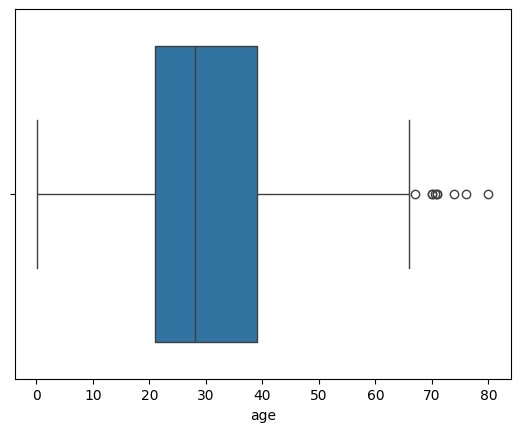

In [339]:
import seaborn as sns

series = df['age']
print(series)
sns.boxplot(x='age', data=df)

In [340]:
q1 = series.quantile(0.25)
q3 = series.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
mask = (series < lower_bound) | (series > upper_bound)
df = df[~mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1300 non-null   int64  
 1   survived  1300 non-null   int64  
 2   sex       1300 non-null   object 
 3   age       1037 non-null   float64
 4   sibsp     1300 non-null   int64  
 5   parch     1300 non-null   int64  
 6   ticket    1300 non-null   object 
 7   fare      1299 non-null   float64
 8   cabin     290 non-null    object 
 9   boat      484 non-null    object 
 10  title     1300 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 121.9+ KB


<Axes: xlabel='age'>

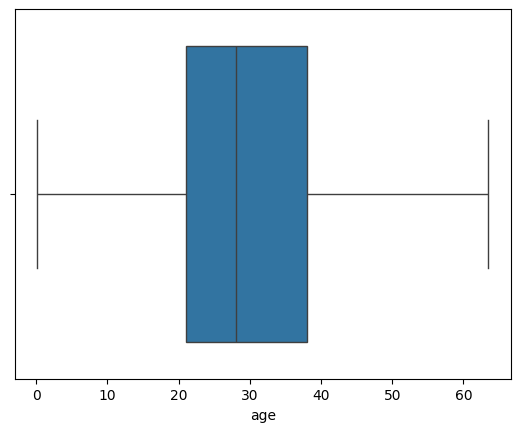

In [ ]:
# put outliers in upper whisker
import numpy as np
series = df['age']
q1 = series.quantile(0.25)
q3 = series.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])
sns.boxplot(x='age', data=df)